In [87]:
import re, nltk, spacy, gensim, string
import pandas as pd
import seaborn as sns
import numpy as np

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [88]:
df = pd.read_csv('quora_challenge.csv')
print('We have',len(df), 'questions in the data')

We have 149 questions in the data


In [89]:
a = 100
for i in range(a,a+10):
    print(df.question_text[i])
    print()

How much do I need to study marine enginneeing in Canada?

Why doesn't Lucasfilm hire Adywan for future Star Wars Special Edition release?

Are teacher aloud to give you home work for not going on a field trip?

Is it okay to ask strangers their age in your country?

Which quotation made you think more and why?

What are examples of transverse?

What makes a female character a Mary Sue?

Why do Indian Railways do not maintain tracks to avoid accidents?

When will this formula be positive?

"How much money is ""FU money"" to you?"



In [90]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df_clean = pd.DataFrame(df.question_text.apply(lambda x: clean_text(x)))

In [91]:
a = 100
for i in range(a,a+10):
    print(df_clean.question_text[i])
    print()

how much do i need to study marine enginneeing in canada

why doesnt lucasfilm hire adywan for future star wars special edition release

are teacher aloud to give you home work for not going on a field trip

is it okay to ask strangers their age in your country

which quotation made you think more and why

what are examples of transverse

what makes a female character a mary sue

why do indian railways do not maintain tracks to avoid accidents

when will this formula be positive

how much money is fu money to you



In [92]:
import spacy
nlp = spacy.load(r'/opt/anaconda3/lib/python3.7/site-packages/en_core_web_sm/en_core_web_sm-2.1.0')

In [93]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [94]:
df_clean["question_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['question_text']), axis=1)
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')

In [95]:
df_clean

,question_text,question_lemmatize,question_lemmatize_clean
0,why is saturn v considered an overestimated ro...,why be saturn v consider an overestimated rock...,why be saturn v consider an overestimated rock...
1,why is cheap vodka so good,why be cheap vodka so good,why be cheap vodka so good
2,what does drunk and disorganized mean,what do drunk and disorganize mean,what do drunk and disorganize mean
3,how can i prepare for isro,how can i prepare for isro,how can i prepare for isro
4,what is the probation period after ssc cgl,what be the probation period after ssc cgl,what be the probation period after ssc cgl
...,...,...,...
144,srm or amritha has more placements,srm or amritha have more placement,srm or amritha have more placement
145,how can i cure dandruff,how can i cure dandruff,how can i cure dandruff
146,if someone suffers with severe low self esteem...,if someone suffer with severe low self esteem ...,if someone suffer with severe low self esteem ...
147,how can i white my teeth,how can i white -PRON- tooth,how can i white tooth


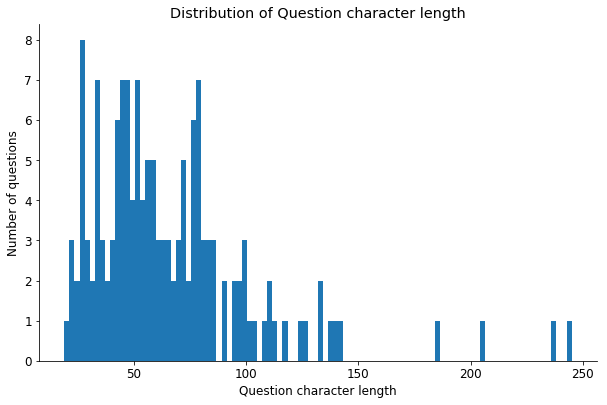

In [96]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.question_text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question character length')
plt.ylabel('Number of questions')
plt.xlabel('Question character length')
sns.despine();

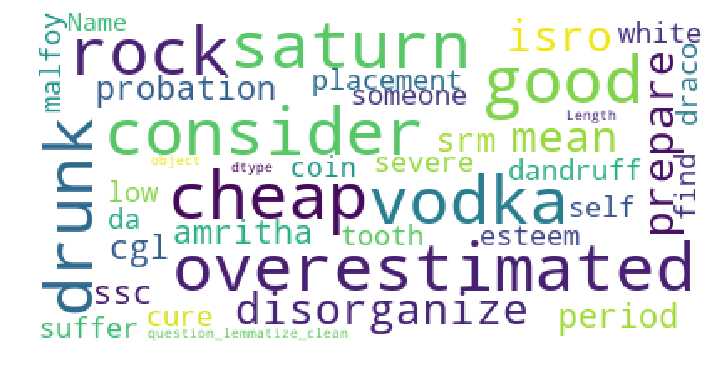

In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_clean['question_lemmatize_clean']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [98]:
df_clean.to_csv('df_clean.csv', index=False)
df_clean = pd.read_csv('df_clean.csv')
df_clean.head()

,question_text,question_lemmatize,question_lemmatize_clean
0,why is saturn v considered an overestimated ro...,why be saturn v consider an overestimated rock...,why be saturn v consider an overestimated rock...
1,why is cheap vodka so good,why be cheap vodka so good,why be cheap vodka so good
2,what does drunk and disorganized mean,what do drunk and disorganize mean,what do drunk and disorganize mean
3,how can i prepare for isro,how can i prepare for isro,how can i prepare for isro
4,what is the probation period after ssc cgl,what be the probation period after ssc cgl,what be the probation period after ssc cgl


In [99]:
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')
df_clean

,question_text,question_lemmatize,question_lemmatize_clean
0,why is saturn v considered an overestimated ro...,why be saturn v consider an overestimated rock...,why be saturn v consider an overestimated rock...
1,why is cheap vodka so good,why be cheap vodka so good,why be cheap vodka so good
2,what does drunk and disorganized mean,what do drunk and disorganize mean,what do drunk and disorganize mean
3,how can i prepare for isro,how can i prepare for isro,how can i prepare for isro
4,what is the probation period after ssc cgl,what be the probation period after ssc cgl,what be the probation period after ssc cgl
...,...,...,...
144,srm or amritha has more placements,srm or amritha have more placement,srm or amritha have more placement
145,how can i cure dandruff,how can i cure dandruff,how can i cure dandruff
146,if someone suffers with severe low self esteem...,if someone suffer with severe low self esteem ...,if someone suffer with severe low self esteem ...
147,how can i white my teeth,how can i white -PRON- tooth,how can i white tooth


In [100]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['question_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [101]:
df2

,unigram,count
0,make,8
1,life,7
2,feel,6
3,good,5
4,movie,4
5,country,4
6,choose,4
7,like,4
8,start,4
9,way,4


In [102]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [103]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_clean['question_lemmatize_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [104]:
df3

,bigram,count
0,saturn consider,1
1,consider overestimated,1
2,overestimated rocket,1
3,rocket dimensionally,1
4,dimensionally lunar,1
5,lunar mission,1
6,cheap vodka,1
7,vodka good,1
8,drunk disorganize,1
9,disorganize mean,1


In [105]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [106]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_clean['question_lemmatize_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [107]:
df4

,trigram,count
0,saturn consider overestimated,1
1,consider overestimated rocket,1
2,overestimated rocket dimensionally,1
3,rocket dimensionally lunar,1
4,dimensionally lunar mission,1
5,cheap vodka good,1
6,drunk disorganize mean,1
7,probation period ssc,1
8,period ssc cgl,1
9,cpu flight simulation,1


In [108]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

In [109]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df_clean['question_lemmatize_clean'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [110]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      -34.262112  -44.199402       1        1  12.600351
17      13.115216  -50.679329       2        1   9.417191
15     -30.832664   53.662914       3        1   7.558834
13     -69.643326  -17.661264       4        1   7.215164
4      -82.472504   76.972740       5        1   6.149728
9       18.457430   81.361855       6        1   5.780738
12     -69.743423  -78.582947       7        1   5.658663
8     -117.514008   11.847217       8        1   5.534495
3       34.267796  -93.361885       9        1   5.410891
5      -20.143467  -93.114571      10        1   4.870349
19      38.742943   -2.745625      11        1   4.073240
6       56.416321   48.508324      12        1   3.955894
16      63.977726  -46.959808      13        1   3.713670
1       85.880188    4.099929      14        1   3.594945
14      -2.854641  -11.874479      15        1   3.048497
7      -30.352396  100.125641      16        1   2.775273
10     -36.068069   10.089860      17        1   2.775273
11    -108.786728  -43.785255      18        1   1.955601
2      -74.777519   31.013430      19        1   1.955601
18       8.377267   32.373611      20        1   1.955601, topic_info=   Category      Freq   Term     Total  loglift  logprob
13  Default  6.000000   make  6.000000  30.0000  30.0000
26  Default  4.000000    use  4.000000  29.0000  29.0000
24  Default  4.000000  think  4.000000  28.0000  28.0000
27  Default  4.000000    way  4.000000  27.0000  27.0000
9   Default  5.000000   good  5.000000  26.0000  26.0000
..      ...       ...    ...       ...      ...      ...
20  Topic20  0.073977  quora  4.261135  -0.1191  -3.4735
26  Topic20  0.080079    use  4.680741  -0.1337  -3.3943
29  Topic20  0.074641  world  4.369382  -0.1352  -3.4646
8   Topic20  0.079764   feel  5.416590  -0.2837  -3.3982
13  Topic20  0.073324   make  6.041290  -0.4770  -3.4824

[647 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         6  0.316756        ask
1         6  0.633610        big
2         1  0.526805     choose
3         8  0.334459       come
3        17  0.334459       come
4         9  0.316700    company
5         6  0.283874    country
5        11  0.283874    country
6         2  0.516474  different
7         4  0.679341        eat
8         1  0.184618       feel
8         3  0.553854       feel
9         2  0.678858       good
10        1  0.500946       high
10       11  0.250473       high
11        1  0.205483       life
11       10  0.410966       life
12        5  0.363733       like
13        7  0.662110       make
14        1  0.521087      money
15        8  0.534685      movie
16        1  0.314060        pay
17        9  0.289106     people
18        3  0.504152     person
19       16  0.366125       play
20        3  0.469358      quora
21        1  0.485548     school
22        1  0.295829      start
22        8  0.295829      start
23        5  0.490886       stay
24       12  0.677662      think
25        9  0.279542       time
25       13  0.279542       time
26       14  0.640924        use
27        4  0.633085        way
28        2  0.414638       work
29        2  0.457731      world
29        6  0.228865      world
30        5  0.498342       year, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 18, 16, 14, 5, 10, 13, 9, 4, 6, 20, 7, 17, 2, 15, 8, 11, 12, 3, 19])

In [111]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,school,money,choose,high,pay,feel,life,start,people,quora,time,think,ask,different,make,country,big,world,good,eat
Topic 1,use,like,start,school,year,world,quora,people,money,eat,movie,different,ask,good,think,feel,stay,person,life,choose
Topic 2,way,good,school,eat,play,come,world,big,make,people,choose,life,money,company,different,pay,quora,start,ask,feel
Topic 3,people,company,time,movie,make,person,school,big,way,start,good,choose,work,money,like,stay,use,pay,quora,eat
Topic 4,year,stay,like,life,quora,ask,pay,people,school,make,person,come,good,country,way,company,world,big,time,money
Topic 5,life,make,company,different,think,start,feel,school,money,big,ask,pay,world,use,way,work,choose,people,stay,time
Topic 6,think,people,work,feel,come,start,company,year,school,make,eat,stay,time,movie,world,use,big,money,like,good
Topic 7,play,country,stay,world,start,school,high,good,movie,person,quora,think,choose,money,year,work,different,use,pay,come
Topic 8,movie,start,come,ask,use,quora,year,stay,company,think,way,feel,good,people,world,big,work,eat,country,person
Topic 9,big,ask,world,country,high,school,good,quora,money,make,people,time,like,start,choose,company,think,different,stay,way


In [112]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,school,money,choose,high,pay,feel,life,start,people,quora,time,think,ask,different,make,country,big,world,good,eat
Topic 1,use,like,start,school,year,world,quora,people,money,eat,movie,different,ask,good,think,feel,stay,person,life,choose
Topic 2,way,good,school,eat,play,come,world,big,make,people,choose,life,money,company,different,pay,quora,start,ask,feel
Topic 3,people,company,time,movie,make,person,school,big,way,start,good,choose,work,money,like,stay,use,pay,quora,eat
Topic 4,year,stay,like,life,quora,ask,pay,people,school,make,person,come,good,country,way,company,world,big,time,money
Topic 5,life,make,company,different,think,start,feel,school,money,big,ask,pay,world,use,way,work,choose,people,stay,time
Topic 6,think,people,work,feel,come,start,company,year,school,make,eat,stay,time,movie,world,use,big,money,like,good
Topic 7,play,country,stay,world,start,school,high,good,movie,person,quora,think,choose,money,year,work,different,use,pay,come
Topic 8,movie,start,come,ask,use,quora,year,stay,company,think,way,feel,good,people,world,big,work,eat,country,person
Topic 9,big,ask,world,country,high,school,good,quora,money,make,people,time,like,start,choose,company,think,different,stay,way


In [113]:

Topics_theme = ['American/Car/Marriage/Story/Life in general', 'Education/Business/Money', 'American Medicare/Trump', 'State/Social/Rights', 
                'Build new life', 'Highly educated Indian engineers in America', 'Tips on improving work day efficiency', 'College/Service/Power', 
                'Company/Human/Invest', 'Bank account/Charge', 'Book/Indian/App/Technology', 'War/Future/Family/USA/Race/Political', 
                'Government/President/Society', 'Relationship/China/Parent/Japan', 'Application/Energy/Machine/Economic/Art/Europe', 'Earth/Marketing/Culture', 
               'Air/Rate/Sleep/Blood/Email', 'Student/Internet/Computer/Science/Research', 'University/Engineering/Language/Software', 
                'Job/Learn/Skill improvement']
df_topic_keywords['topic_theme'] = Topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

topic_theme,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,College/Service/Power,Company/Human/Invest,Bank account/Charge,Book/Indian/App/Technology,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement
Word 0,school,use,way,people,year,life,think,play,movie,big,come,come,make,way,choose,feel,time,good,way,country
Word 1,money,like,good,company,stay,make,people,country,start,ask,ask,different,good,eat,life,quora,stay,world,life,high
Word 2,choose,start,school,time,like,company,work,stay,come,world,play,person,company,like,pay,person,country,different,stay,company
Word 3,high,school,eat,movie,life,different,feel,world,ask,country,make,play,play,play,country,people,use,work,start,choose
Word 4,pay,year,play,make,quora,think,come,start,use,high,start,school,like,money,start,time,school,life,use,money
Word 5,feel,world,come,person,ask,start,start,school,quora,school,life,company,movie,person,movie,choose,people,start,feel,time
Word 6,life,quora,world,school,pay,feel,company,high,year,good,school,eat,way,time,stay,ask,ask,ask,work,school
Word 7,start,people,big,big,people,school,year,good,stay,quora,stay,make,money,come,money,stay,come,quora,big,feel
Word 8,people,money,make,way,school,money,school,movie,company,money,world,use,school,stay,quora,eat,person,company,think,pay
Word 9,quora,eat,people,start,make,big,make,person,think,make,time,stay,eat,company,come,company,high,money,ask,good


In [114]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [115]:
df_document_topic

topic_theme,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,College/Service/Power,Company/Human/Invest,Bank account/Charge,...,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement,dominant_topic
Doc0,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
Doc1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.52,0.03,0.03,17
Doc2,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
Doc3,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
Doc4,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc144,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
Doc145,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
Doc146,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.52,0.03,0.03,17
Doc147,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0


In [116]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

In [117]:
df_sent_topic

,question_text,question_lemmatize,question_lemmatize_clean,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,...,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement,dominant_topic
0,why is saturn v considered an overestimated ro...,why be saturn v consider an overestimated rock...,why be saturn v consider an overestimated rock...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
1,why is cheap vodka so good,why be cheap vodka so good,why be cheap vodka so good,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.52,0.03,0.03,17
2,what does drunk and disorganized mean,what do drunk and disorganize mean,what do drunk and disorganize mean,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
3,how can i prepare for isro,how can i prepare for isro,how can i prepare for isro,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
4,what is the probation period after ssc cgl,what be the probation period after ssc cgl,what be the probation period after ssc cgl,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,srm or amritha has more placements,srm or amritha have more placement,srm or amritha have more placement,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
145,how can i cure dandruff,how can i cure dandruff,how can i cure dandruff,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0
146,if someone suffers with severe low self esteem...,if someone suffer with severe low self esteem ...,if someone suffer with severe low self esteem ...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.52,0.03,0.03,17
147,how can i white my teeth,how can i white -PRON- tooth,how can i white tooth,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0


In [118]:
df_topic_theme = df_sent_topic[['question_text', 'dominant_topic']]
df_topic_theme.head(10)

,question_text,dominant_topic
0,why is saturn v considered an overestimated ro...,0
1,why is cheap vodka so good,17
2,what does drunk and disorganized mean,0
3,how can i prepare for isro,0
4,what is the probation period after ssc cgl,0
5,what cpu is better for flight simulation or,0
6,which one is the safest hoverboard to buy in,0
7,can we change the human model as far as ingest...,5
8,why do some christians make some of those nonc...,12
9,who have been the worst cast actors for movies...,8


In [119]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'American/Car/Marriage/Story/Life in general'
    if row['dominant_topic'] == 1 :
        return 'Education/Business/Money'
    if row['dominant_topic'] == 2 :
        return 'American Medicare/Trump'
    if row['dominant_topic'] == 3:
        return 'State/Social/Rights'
    if row['dominant_topic']  == 4:
        return 'Build new life'
    if row['dominant_topic'] == 5:
        return 'Highly educated Indian engineers in America'
    if row['dominant_topic'] == 6:
        return 'Tips on improving work day efficiency'
    if row['dominant_topic'] == 7:
        return 'College/Service/Power'
    if row['dominant_topic'] == 8:
        return 'Company/Human/Invest'
    if row['dominant_topic'] == 9:
        return 'Bank account/Charge'
    if row['dominant_topic'] == 10:
        return 'Book/Indian/App/Technology'
    if row['dominant_topic'] == 11:
        return 'War/Future/Family/USA/Race/Political'
    if row['dominant_topic'] == 12:
        return 'Government/President/Society'
    if row['dominant_topic'] == 13:
        return 'Relationship/China/Parent/Japan'
    if row['dominant_topic'] == 14:
        return 'Application/Energy/Machine/Economic/Art/Europe'
    if row['dominant_topic'] == 15:
        return 'Earth/Marketing/Culture'
    if row['dominant_topic'] == 16:
        return 'Air/Rate/Sleep/Blood/Email'
    if row['dominant_topic'] == 17:
        return 'Student/Internet/Computer/Science/Research'
    if row['dominant_topic'] == 18:
        return 'University/Engineering/Language/Software'
    if row['dominant_topic'] == 19:
        return 'Job/Learn/Skill improvement'

In [120]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
df_topic_theme.head(15)

,question_text,dominant_topic,dominant_topic_theme
0,why is saturn v considered an overestimated ro...,0,American/Car/Marriage/Story/Life in general
1,why is cheap vodka so good,17,Student/Internet/Computer/Science/Research
2,what does drunk and disorganized mean,0,American/Car/Marriage/Story/Life in general
3,how can i prepare for isro,0,American/Car/Marriage/Story/Life in general
4,what is the probation period after ssc cgl,0,American/Car/Marriage/Story/Life in general
5,what cpu is better for flight simulation or,0,American/Car/Marriage/Story/Life in general
6,which one is the safest hoverboard to buy in,0,American/Car/Marriage/Story/Life in general
7,can we change the human model as far as ingest...,5,Highly educated Indian engineers in America
8,why do some christians make some of those nonc...,12,Government/President/Society
9,who have been the worst cast actors for movies...,8,Company/Human/Invest


In [122]:
df.question_text[2]

'What does drunk and disorganized mean?'

In [123]:
df.question_text[8]

'Why do some Christians make some of those non-Christians believe that there is a God?'

In [124]:
df_topic_keywords.T['University/Engineering/Language/Software']

Word 0           way
Word 1          life
Word 2          stay
Word 3         start
Word 4           use
Word 5          feel
Word 6          work
Word 7           big
Word 8         think
Word 9           ask
Word 10    different
Word 11        money
Word 12          eat
Word 13       school
Word 14      country
Word 15        movie
Word 16         come
Word 17          pay
Word 18      company
Word 19        world
Name: University/Engineering/Language/Software, dtype: object

In [125]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

,dominant_topic,dominant_topic_theme,count
0,0,American/Car/Marriage/Story/Life in general,77
1,17,Student/Internet/Computer/Science/Research,12
2,4,Build new life,8
3,15,Earth/Marketing/Culture,8
4,12,Government/President/Society,6
5,9,Bank account/Charge,6
6,13,Relationship/China/Parent/Japan,6
7,6,Tips on improving work day efficiency,4
8,3,State/Social/Rights,4
9,1,Education/Business/Money,4


In [126]:
df_topic_distribution = df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

In [127]:
df_topic_distribution

,dominant_topic,dominant_topic_theme,count
0,0,American/Car/Marriage/Story/Life in general,77
1,17,Student/Internet/Computer/Science/Research,12
2,4,Build new life,8
3,15,Earth/Marketing/Culture,8
4,12,Government/President/Society,6
5,9,Bank account/Charge,6
6,13,Relationship/China/Parent/Japan,6
7,6,Tips on improving work day efficiency,4
8,3,State/Social/Rights,4
9,1,Education/Business/Money,4


In [128]:
# Tokenize and Clean-up using gensim’s simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [129]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# We will not assign dependency labels, and we will not lable named entities. And we need pos. 
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["What are the most important lessons you have learned in your life and when did you learn them?"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['life', 'make', 'company', 'different', 'think', 'start', 'feel', 'school', 'money', 'big', 'ask', 'pay', 'world', 'use', 'way', 'work', 'choose', 'people', 'stay', 'time']


In [130]:
topic, prob_scores

(['life',
  'make',
  'company',
  'different',
  'think',
  'start',
  'feel',
  'school',
  'money',
  'big',
  'ask',
  'pay',
  'world',
  'use',
  'way',
  'work',
  'choose',
  'people',
  'stay',
  'time'],
 array([[0.025, 0.025, 0.025, 0.025, 0.025, 0.525, 0.025, 0.025, 0.025,
         0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
         0.025, 0.025]]))

In [131]:
df_topic_keywords.T['Student/Internet/Computer/Science/Research']

Word 0          good
Word 1         world
Word 2     different
Word 3          work
Word 4          life
Word 5         start
Word 6           ask
Word 7         quora
Word 8       company
Word 9         money
Word 10       person
Word 11       people
Word 12          eat
Word 13          use
Word 14         come
Word 15         stay
Word 16         play
Word 17         year
Word 18      country
Word 19          pay
Name: Student/Internet/Computer/Science/Research, dtype: object

In [132]:
df_topic_theme.head()

,question_text,dominant_topic,dominant_topic_theme
0,why is saturn v considered an overestimated ro...,0,American/Car/Marriage/Story/Life in general
1,why is cheap vodka so good,17,Student/Internet/Computer/Science/Research
2,what does drunk and disorganized mean,0,American/Car/Marriage/Story/Life in general
3,how can i prepare for isro,0,American/Car/Marriage/Story/Life in general
4,what is the probation period after ssc cgl,0,American/Car/Marriage/Story/Life in general
